In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/DataSet 1/Train'
validation_dir = '/content/drive/MyDrive/DataSet 1/Validation'
test_dir = '/content/drive/MyDrive/DataSet 1/Test'

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (299, 299)
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_12[0][0]    

 Total params: 22,960,681 (87.59 MB)

 Trainable params: 11,039,553 (42.11 MB)

 Non-trainable params: 11,921,128 (45.48 MB)

In [ ]:
from tensorflow.keras.callbacks import Callback
import gc

class ClearMemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        tf.keras.backend.clear_session()
        gc.collect()
        print("\nMemory cleared after epoch", epoch+1)

clear_memory = ClearMemoryCallback()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    steps_per_epoch=None,
    validation_data=val_generator,
    validation_steps=None,
    epochs=50,
    callbacks=[early_stopping, clear_memory]
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.4937 - loss: 0.7925 
Memory cleared after epoch 1
63/63 ━━━━━━━━━━━━━━━━━━━━ 2143s 34s/step - accuracy: 0.4941 - loss: 0.7913 - val_accuracy: 0.8508 - val_loss: 0.5028
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.8242 - loss: 0.4906 
Memory cleared after epoch 2
63/63 ━━━━━━━━━━━━━━━━━━━━ 2062s 33s/step - accuracy: 0.8247 - loss: 0.4895 - val_accuracy: 0.8608 - val_loss: 3.1149
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.9094 - loss: 0.2597 
Memory cleared after epoch 3
63/63 ━━━━━━━━━━━━━━━━━━━━ 2050s 33s/step - accuracy: 0.9095 - loss: 0.2594 - val_accuracy: 0.9342 - val_loss: 0.4697
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.9419 - loss: 0.1558 
Memory cleared after epoch 4
63/63 ━━━━━━━━━━━━━━━━━━━━ 2109s 34s/step - accuracy: 0.9418 - loss: 0.1559 - val_accuracy: 0.9258 - val_loss: 0.3046
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.9540 - l

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 954s 15s/step - accuracy: 0.8753 - loss: 0.6709
Test Accuracy: 88.00%


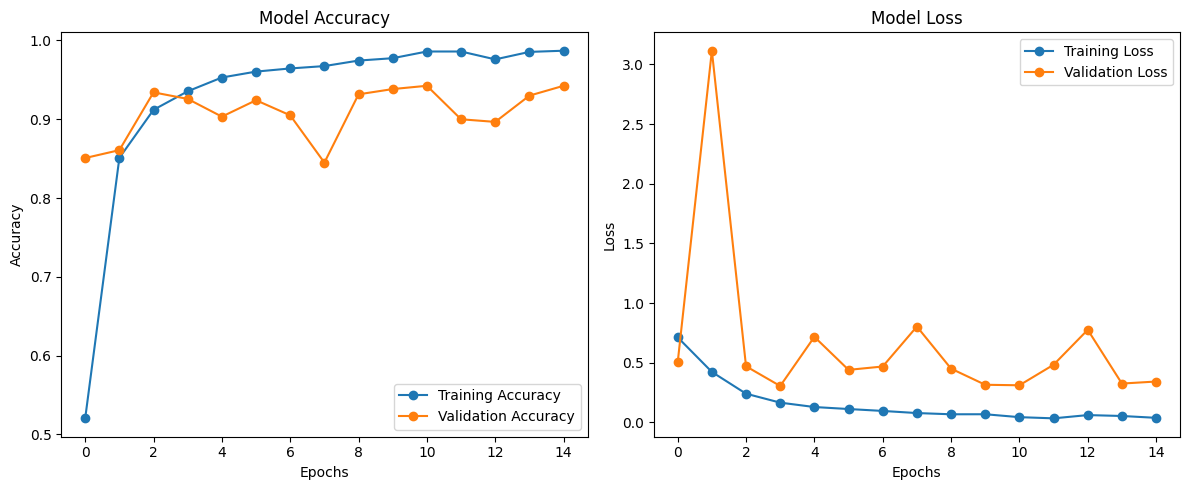

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

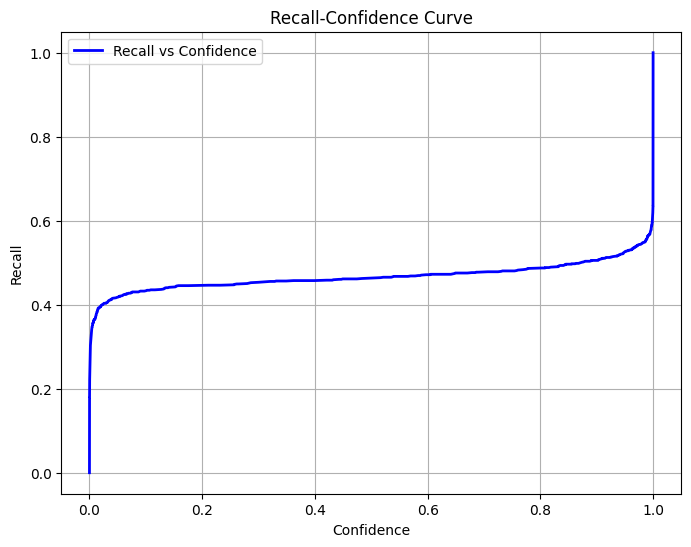

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)

# Plot recall-confidence (as 1-threshold)
plt.figure(figsize=(8, 6))
plt.plot(1 - thresholds, recall[:-1], color='blue', linewidth=2, label='Recall vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Recall')
plt.title('Recall-Confidence Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/models/deepfake_model_detection.keras")